In [39]:
import pandas as pd
import numpy as np
import sqlite3
import pandasql as ps
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.dates import DateFormatter
sns.set_style("white")
import statsmodels.api as sm

In [2]:
conn = sqlite3.connect('data_covid.db')
c = conn.cursor()

In [3]:
df = pd.read_csv("owid-covid-data.csv")
df.to_sql('data', conn, if_exists='append', index = False)

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86413,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86414,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86415,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86416,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


### How many countries are included in our data set?

In [6]:
c.execute("SELECT COUNT(DISTINCT location) FROM data WHERE location != 'World' AND location != 'Europe' AND location != 'North America' AND location != 'South America' AND location != 'Asia' AND location != 'European Union' AND location != 'Africa' AND location != 'Oceania'").fetchone()

(211,)

### When was the most recent entry?

In [7]:
c.execute("SELECT date FROM data ORDER BY date DESC").fetchone()

('2021-05-06',)

### What country had the highest single day deaths per million? 

In [8]:
c.execute("SELECT DISTINCT(date), location, new_deaths FROM data WHERE location != 'World' AND location != 'Europe' AND location != 'North America' AND location != 'South America' AND location != 'Asia' AND location != 'European Union' ORDER BY new_deaths DESC").fetchone()

('2021-01-12', 'United States', 4475.0)

### Select any country. How many times have the deaths per million exceeded 1,000 in one day? 

In [9]:
c.execute("SELECT DISTINCT(date), location, total_deaths_per_million FROM data WHERE location = 'United States' AND total_deaths_per_million > 1000").fetchall()

[('2020-12-23', 'United States', 1001.8889999999999),
 ('2020-12-24', 'United States', 1010.675),
 ('2020-12-25', 'United States', 1014.9860000000001),
 ('2020-12-26', 'United States', 1020.681),
 ('2020-12-27', 'United States', 1024.992),
 ('2020-12-28', 'United States', 1031.046),
 ('2020-12-29', 'United States', 1042.019),
 ('2020-12-30', 'United States', 1053.2939999999999),
 ('2020-12-31', 'United States', 1063.807),
 ('2021-01-01', 'United States', 1070.303),
 ('2021-01-02', 'United States', 1077.88),
 ('2021-01-03', 'United States', 1082.251),
 ('2021-01-04', 'United States', 1088.5710000000001),
 ('2021-01-05', 'United States', 1099.792),
 ('2021-01-06', 'United States', 1111.653),
 ('2021-01-07', 'United States', 1123.695),
 ('2021-01-08', 'United States', 1136.106),
 ('2021-01-09', 'United States', 1146.139),
 ('2021-01-10', 'United States', 1152.181),
 ('2021-01-11', 'United States', 1158.538),
 ('2021-01-12', 'United States', 1172.057),
 ('2021-01-13', 'United States', 1184

### Extract the deaths per million for US, France, and India. Plot the time series data and compare results to what the media is currently saying

In [10]:
df1 = ps.sqldf("SELECT date, location, total_deaths_per_million FROM df WHERE location == 'United States' OR location == 'India' OR location == 'France'")

In [11]:
df1 = df1.dropna()
df1['date']= pd.to_datetime(df1['date'])

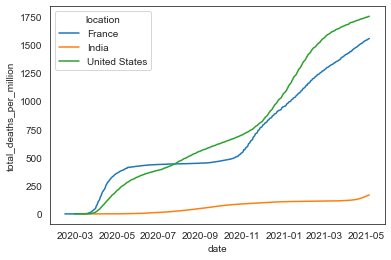

In [12]:
sns.lineplot(x="date", y="total_deaths_per_million", hue="location", data=df1);

### Plot the deaths per million and cases per million by continent for your birthday in 2020. What does the data say?

In [48]:
df2 = ps.sqldf("SELECT date, continent, MAX(total_deaths_per_million) as total_deaths, total_cases_per_million, ((total_deaths_per_million / total_cases_per_million) * 100) as percentage FROM df WHERE date == '2020-12-21' AND continent != 'None' GROUP BY continent ORDER BY percentage DESC")

In [49]:
df2['date']= pd.to_datetime(df2['date'])
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     6 non-null      datetime64[ns]
 1   continent                6 non-null      object        
 2   total_deaths             6 non-null      float64       
 3   total_cases_per_million  6 non-null      float64       
 4   percentage               6 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 368.0+ bytes


,date,continent,total_deaths,total_cases_per_million,percentage
0,2020-12-21,South America,1125.293,30253.599,3.719534
1,2020-12-21,Oceania,35.608,1106.633,3.217688
2,2020-12-21,Africa,419.955,15692.658,2.676124
3,2020-12-21,Europe,1620.602,62908.834,2.576112
4,2020-12-21,North America,981.285,54844.649,1.789208
5,2020-12-21,Asia,896.318,51992.182,1.723948


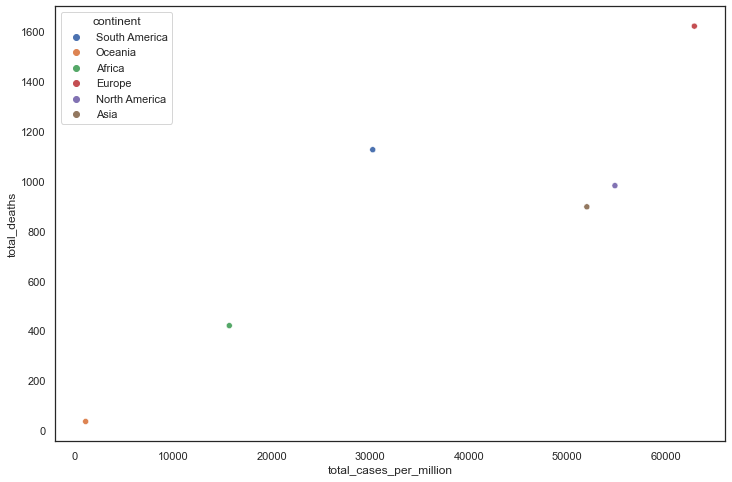

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df2, x="total_cases_per_million", y="total_deaths", hue="continent");

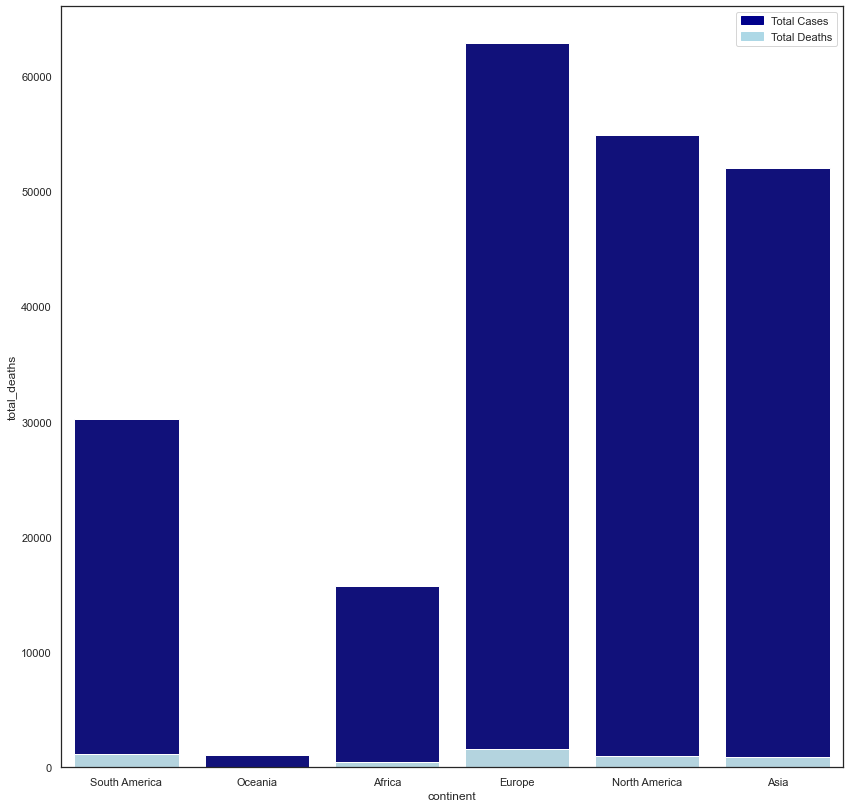

In [51]:
# set the figure size
plt.figure(figsize=(14, 14))

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="continent",  y="total_cases_per_million", data=df2, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="continent", y="total_deaths", data=df2, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Total Cases')
bottom_bar = mpatches.Patch(color='lightblue', label='Total Deaths')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

### Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?

In [22]:
df3 = ps.sqldf("SELECT date, stringency_index, total_cases_per_million, total_deaths_per_million, continent FROM df")

In [23]:
df3 = df3.dropna()
df3['date']= pd.to_datetime(df3['date'])

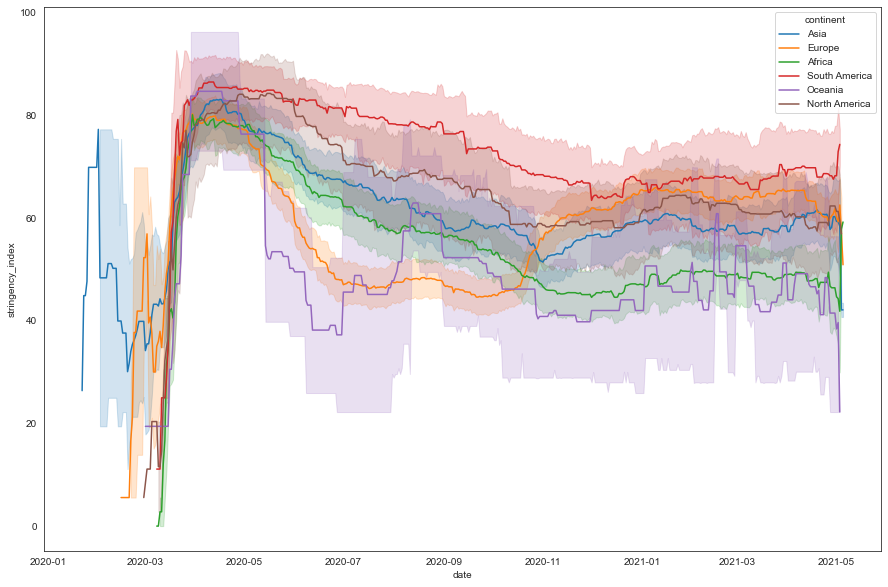

In [18]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df3, x='date', y='stringency_index', hue='continent');

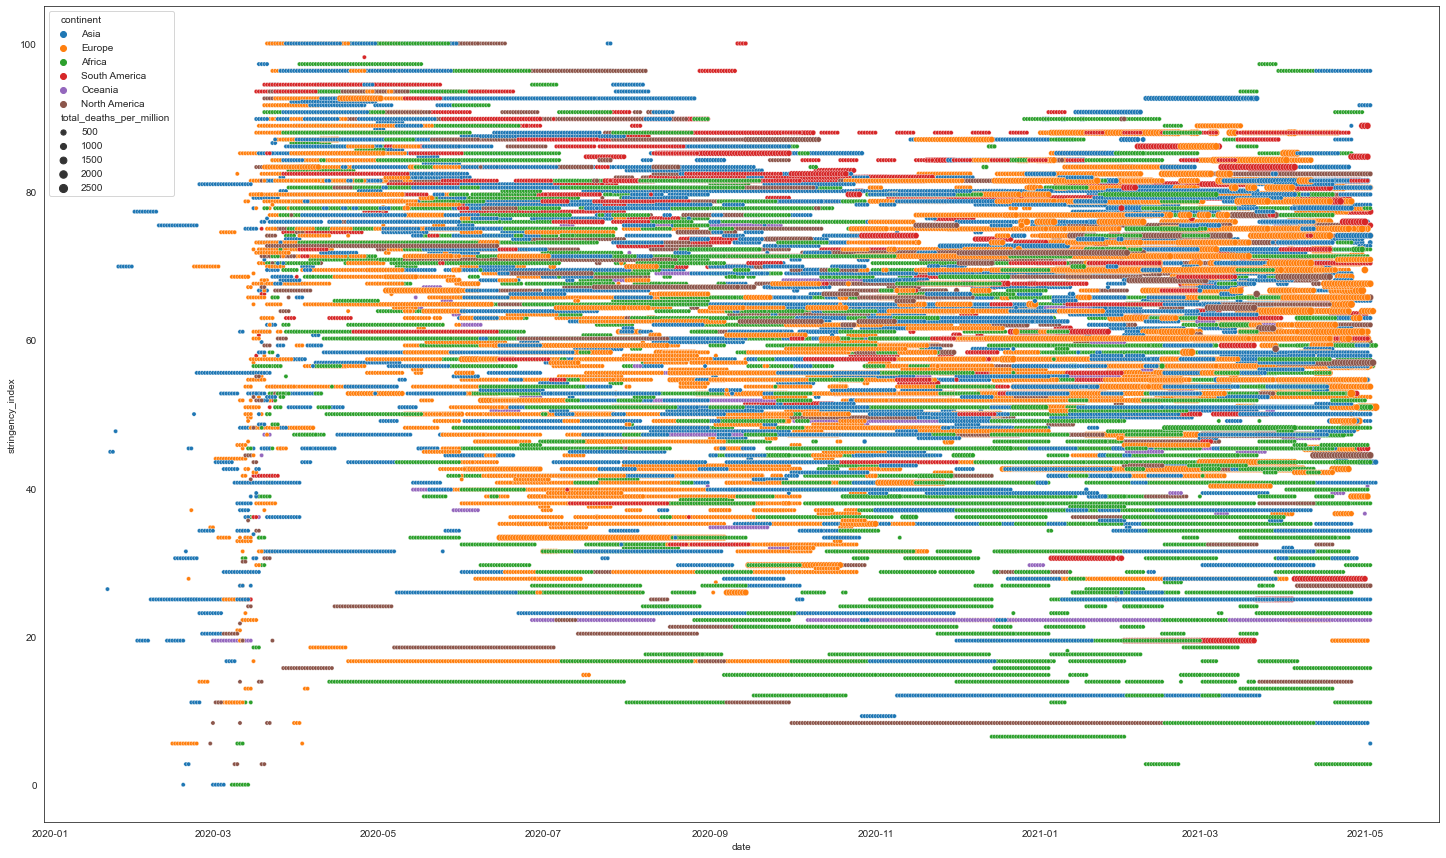

In [19]:
plt.figure(figsize=(25,15))
sns.scatterplot(data=df3, x="date", y="stringency_index",size="total_deaths_per_million", hue="continent");


### Bonus 1 : Plot deaths per million for one country. Find Google's mobility for that country. Determine if lockdowns for that country have influenced deaths per million (changed the shape of the curve). Remember, you have have to create a lagged variable to account for time from infection to death (median time ~ 15 days). Therefore, any change in policy ("lockdown") would take ~15 days to see an effect


### Bonus 2 : Plot cases per million for a given country. Look up when masks became mandatory in that country. Did this implementation of this anti-social and anti-science intervention change the shape of the curve. (Meaning was their a sharp change in case numbers?)